In [1]:
from profiler.core import *

In [2]:
pf = Profiler(workers = 2, tol=1e-6, eps=0.05, embedtxt=True)

In [3]:
pf.session.load_data(name='Mam', src=FILE, fpath='./hce_data/mam/mam.csv', check_param=True, na_values='empty')

INFO:profiler.utility:[0.015428781509399414] Load Data start

INFO:profiler.data.dataset:parameters used for data loading:
 {'na_values': 'empty', 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.data.dataset:inferred types of attributes: {
    "rads": "numeric",
    "age": "numeric",
    "shape": "numeric",
    "margin": "numeric",
    "density": "numeric",
    "severity": "numeric"
}
INFO:profiler.data.dataset:(possible types: numeric, categorical, text, date)
INFO:profiler.data.dataset:inferred operators of attributes: {'rads': ['equal'], 'age': ['equal'], 'shape': ['equal'], 'margin': ['equal'], 'density': ['equal'], 'severity': ['equal']}
INFO:profiler.data.dataset:(possible operators: equal, notequal, greater_than, less_than)
INFO:profiler.utility:[0.053342580795288086] Load Data execution time: 0.03791379928588867



In [4]:
pf.session.load_training_data(multiplier = None)

INFO:profiler.utility:[0.0626823902130127] Create Training Data start

INFO:profiler.data.transformer:needs multiplier = 3 to bound the error in inv cov estimation <= 0.05000000
INFO:profiler.data.transformer:use multiplier = 3, and the bound is 0.00172737
INFO:profiler.data.transformer:Draw Pairs
100%|██████████| 6/6 [00:00<00:00, 301.30it/s]
INFO:profiler.data.transformer:Number of training samples: 4980
INFO:profiler.data.transformer:Computing Differences
INFO:profiler.data.transformer:estimated missing data probability in training data is 0.0000
INFO:profiler.utility:[0.17740702629089355] Create Training Data execution time: 0.11472463607788086



In [5]:
# set sparsity to 0 for exp_reproduce 
autoregress_matrix = pf.session.learn_structure(sparsity=0, infer_order=True)

INFO:profiler.utility:[0.18874073028564453] Learn Structure start

INFO:profiler.learner:use threshold 0.3933
INFO:profiler.utility:[0.2922170162200928] Learn Structure execution time: 0.10347628593444824



In [6]:
parent_sets = pf.session.get_dependencies(score="fit_error")

INFO:profiler.utility:[0.30127477645874023] Get Dependencies start

INFO:profiler.utility:[0.3419046401977539] Get Dependencies execution time: 0.04062986373901367



margin -> shape (0.20437150889945058)
margin,shape -> severity (0.22486573027109524)
margin,severity -> rads (0.2027391437277065)
severity -> age (0.016375741421960955)


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


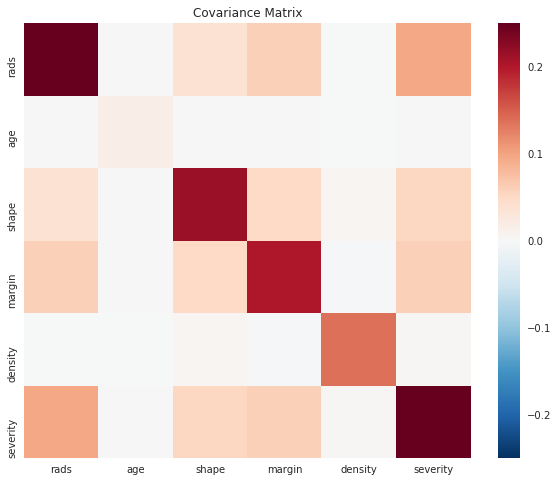

In [7]:
pf.session.visualize_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


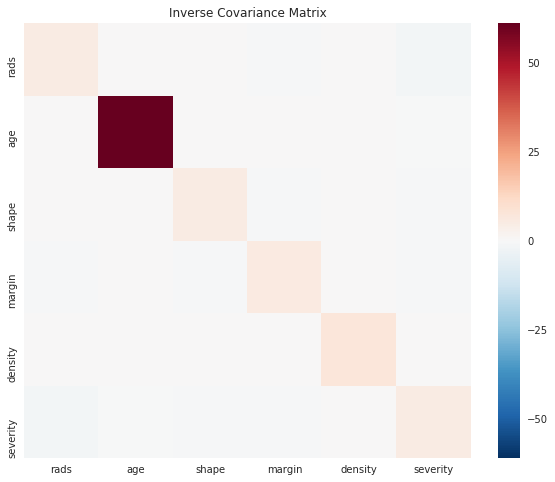

threshold =  12
sum =  [2.58255726 0.45877004 1.72244566 2.65705502 0.         3.68339545]
attr =  Index(['rads', 'age', 'shape', 'margin', 'density', 'severity'], dtype='object')
Attr w/o dependency: 
 Index([['rads'], ['age'], ['shape'], ['margin'], ['density'], ['severity']], dtype='object')


Attr w/ dependency: 
 Index([], dtype='object')


In [8]:
pf.session.visualize_inverse_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


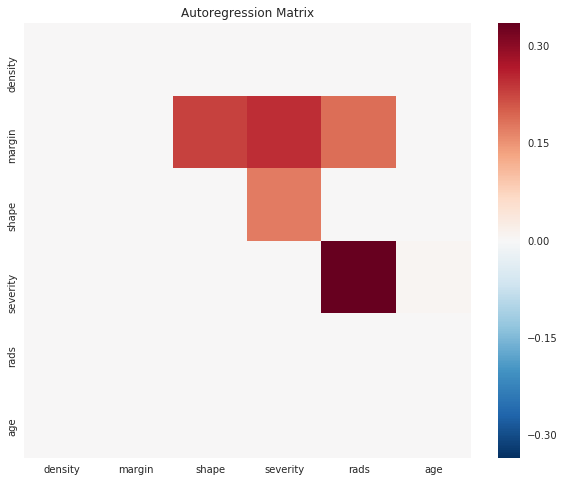

In [9]:
pf.session.visualize_autoregression()

In [10]:
pf.session.timer.get_stat()

,time_point,msg,execution_time
0,0.015429,start: Load Data,0.000000
1,0.053343,end: Load Data,0.037914
2,0.062682,start: Create Training Data,0.000000
3,0.177407,end: Create Training Data,0.114725
4,0.188741,start: Learn Structure,0.000000
5,0.292217,end: Learn Structure,0.103476
6,0.301275,start: Get Dependencies,0.000000
7,0.341905,end: Get Dependencies,0.040630
8,0.341905,total_execution_time,0.296745


In [11]:
pf.session.timer.to_csv()